<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part4/P4_Ch04_CH04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FashionMNIST data 불러오기

In [1]:
import torch
print(torch.__version__)

1.13.1+cu116


In [2]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr
from torchvision import datasets 


In [4]:
training_data = datasets.FashionMNIST(
    root ='data',
    train = True,
    download =True,
    transform =ToTensor()
)
test_data = datasets.FashionMNIST(
    root ='data',
    train =False,
    download =True,
    transform =ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# 데이터 시각화하기


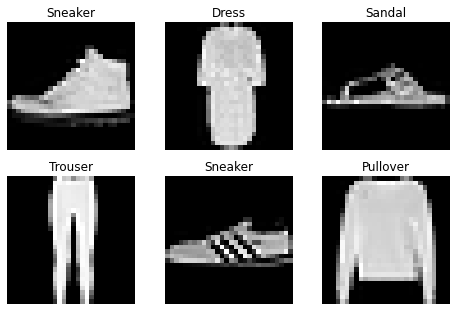

In [34]:
labels_map ={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}
figure =plt.figure(figsize =(8,8))
cols, rows = 3,3
for i in range(1, cols + rows +1):
  sample_idx = torch.randint(len(training_data), size =(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap ='gray')
plt.show()

# DataLoader 만들기

In [35]:
# DataLoader 만들기
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle =True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False)

Feature batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


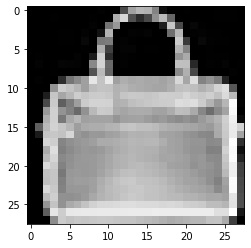

Label: 8


In [36]:
# DataLoader를 통해 반복하기(iterate)
# 이미지와 정답(Label)을 표시한다

train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape:{train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Label: {label}')

# Custom Dataset, Data Loader만들기


In [62]:
# 간단한  Custom Dataset / Transform/ DataLoader 만들기

class CustomDataset(Dataset):
  def __init__(self, np_data, transform = None):
    self.data = np_data
    self.transform = transform
    self.len = np_data.shape[0]
  def __len__(self):
    return self.len
  def __getitem__(self, idx):
    sample = self.data[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [63]:
def square(sample):
  return sample**2

In [64]:
trans = tr.Compose([square]) #여러개를 넣을 수 있다.

In [65]:
np_data = np.arange(10)

custom_dataset = CustomDataset(np_data, transform = trans)

In [66]:
custom_dataloader = DataLoader(custom_dataset, batch_size = 2, shuffle = True)

In [67]:
for _ in range(3):
  for data in custom_dataloader:
    print(data)
  print("="*20)

tensor([49, 36])
tensor([9, 4])
tensor([64, 81])
tensor([16, 25])
tensor([0, 1])
tensor([64, 16])
tensor([36, 49])
tensor([25,  9])
tensor([81,  0])
tensor([1, 4])
tensor([ 4, 64])
tensor([25, 36])
tensor([16, 49])
tensor([81,  1])
tensor([0, 9])


# Model

In [5]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


## Model class 만들기


In [8]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128), #tensorflow의 Dense
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )

  def forward(self, x): #tensorflow의 call
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [9]:
# Model instance 생성, device 설정
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [18]:
# 가상의 data만들어서 예측해보기
X = torch.rand(1,28,28, device = device)
logits = model(X)
print(logits)
pred_probab = nn.Softmax(dim = 1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

tensor([[ 0.4354, -0.0746, -0.4126, -0.1909,  0.1393,  0.0522, -0.2763, -0.0641,
         -0.0253,  0.0734]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.1559, 0.0936, 0.0668, 0.0833, 0.1160, 0.1063, 0.0765, 0.0946, 0.0984,
         0.1086]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0], device='cuda:0')
